<a href="https://colab.research.google.com/github/alexandreIFB/projects_colabority/blob/master/P4_alexandreAbreu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Atividade Prática 4 - Alinhamento Múltiplo e Blast
## Aluno: Alexandre Abreu

1) Estamos estudando um conjunto de sequências de snoRNAs, um tipo de RNA não codificador pequeno responsável por modificações químicas em outros ncRNAs. Queremos descobrir se determinados snoRNAs presentes em diferentes espécies são ortólogos. Dois genes homólogos são designados ortólogos quando estes foram separados por um evento de especiação, onde cada cópia do gene divergiu para duas espécies distintas. Sendo assim, genes ortólogos partilham um ancestral comum e têm funções iguais. Para inferir se um conjunto de snoRNAs são ortólogos, foi dada a ideia de primeiramente realizar um alinhamento múltiplo usando o programa Clustal Omega.

a) As sequências a serem analisadas estão no arquivo snoRNAsOrtologos.fasta.

i) Qual tipo de snoRNA será comparado?

 **proteínas ribossomais**

ii) Procure sobre este snoRNA no banco de dados RFAM. Qual classe de snoRNA estas
sequências são classificadas? Quais sequências de motivos são conservadas nessa famíla de
snoRNA?

<strong>

Segundo o site RFAM: 

* O snoRNA U102 pertence à classe C/D box de snoRNAs que contêm os motivos de sequência conservados conhecidos como C box (UGAUGA) e D box (CUGA)

iii) Liste quais organismos serão comparados em nosso alinhamento múltiplo.

In [5]:
filename = '/content/snoRNAsOrtologos.fasta'

dictSeqs = {}

with open(filename) as fp:
    for linha in fp:
      if(linha[0] == '>'):
        header = linha.rstrip()
        dictSeqs[header] = ''
      else:
        linha.rstrip()
        dictSeqs[header] = dictSeqs[header] + linha.replace('\n','')

for i in dictSeqs.keys():
  print(i)

>Canis_familiaris300369_SNORD102
>Dasypus_novemcinctus300001_SNORD102
>Echinops_telfairi300320_SNORD102
>Equus_caballus300350_SNORD102
>Erinaceus_europaeus300410_SNORD102
>Homo_sapiens300597_SNORD102
>Loxodonta_africana300437_SNORD102
>Macaca_mulatta300736_SNORD102
>Microcebus_murinus300424_SNORD102
>Mus_musculus300778_SNORD102
>Ornithorhynchus_anatinus303877_SNORD102
>Oryctolagus_cuniculus300415_SNORD102
>Pan_troglodytes300737_SNORD102
>Pongo_pygmaeus300712_SNORD102
>Rattus_norvegicus301020_SNORD102
>Sorex_araneus301025_SNORD102


b) Utilize a ferramenta web Clustal Omega (https://www.ebi.ac.uk/Tools/msa/clustalo/) para alinhar as sequências de snoRNAs. 

Obs.: Use todos os parâmetros default. Note que as sequências do arquivo fasta, embora serem de RNAs, estão no formato DNA. A partir da saída do programa, realize as tarefas a seguir:

i) Faça o download do arquivo de alinhamento.

**OK**

ii) Tire um printscreen da árvore filogenética/guia gerada.

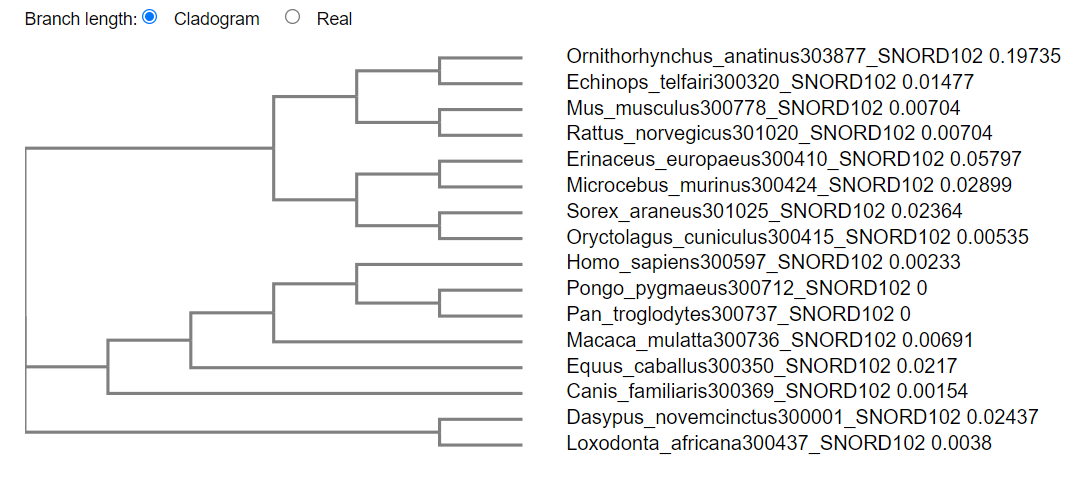

iii) Crie uma espécie de ranking que mostra quais organismos são mais próximos do Homo
sapiens quando comparada a esta família de snoRNAs.

<strong>

Pongo_pygmaeus300712_SNORD102	9

Pan_troglodytes300737_SNORD102	9

Macaca_mulatta300736_SNORD102	8

Equus_caballus300350_SNORD102	7

Canis_familiaris300369_SNORD102	6

Dasypus_novemcinctus300001_SNORD102	5

Loxodonta_africana300437_SNORD102	5

Ornithorhynchus_anatinus303877_SNORD102	5

Echinops_telfairi300320_SNORD102	5

Mus_musculus300778_SNORD102	5

Rattus_norvegicus301020_SNORD102	5

Erinaceus_europaeus300410_SNORD102	5

Microcebus_murinus300424_SNORD102	5

Sorex_araneus301025_SNORD102	5

Oryctolagus_cuniculus300415_SNORD102	5
</strong>


iv) Busque os motivos conservados dessa família de snoRNA. O alinhamento realizado mostra
conservação desses motivos em diferentes organismos? Justifique sua resposta indicando em
que posição das sequências este motivo ocorre, caso seja observada a conservação.

Sim, Mas posições 3 6 7 8 9 10 11 12 14 23 34 36 37 45 46 47 51 52 53 54 57 temos conservação completa

c) A partir do alinhamento realizado, podemos inferir ortologia para essas sequências?

**Sim, e possivel reparar q apartir do Ornithorhynchus_anatinus3 foram acontencendo algumas modificacoes e outras se matendo mesmo ao mudar de especie de organismos**

2) Voltando ao estudo feito na primeira atividade prática, sobre uma aranha encontrada na Baía de
Guanabara, foram identificadas 3 sequências (sequence.fasta) com grandes chances de serem
associadas à toxinas. Para investigarmos a função dessas sequências, iremos compará-las contra uma
coleção de proteínas (toxinsDB.fasta) usando o Blast.

a) Crie um banco de dados a partir da coleção de proteínas usando o comando makeblastdb no
terminal do linux:

i) makeblastdb -in <coleçãoDeDados.fasta> -out <toxinsDB> -dbtype prot

Quais arquivos foram gerados? Inclua esses arquivos no envio desta tarefa.

* **toxinsDB.phr**
* **toxinsDB.pin**
* **toxinsDB.psq**

b) Temos uma query com sequências de nucleotídeos e uma coleção de dados de proteínas. Qual
variação de blast devemos usar?

**BlastX**

**BLASTX search protein databases using a translated nucleotide query**

c) Use a variação de blast apropriada para realizar a comparação do conjunto query com o banco de
dados blast gerado.

i) Qual variação é a mais apropriada?

R: blastx


ii) Use o comando blast(?) -help para verificar a quantidade de parâmetro disponíveis. Quais
formatos de saída o blast pode retornar?

     0 = Pairwise,
     1 = Query-anchored showing identities,
     2 = Query-anchored no identities,
     3 = Flat query-anchored showing identities,
     4 = Flat query-anchored no identities,
     5 = BLAST XML,
     6 = Tabular,
     7 = Tabular with comment lines,
     8 = Seqalign (Text ASN.1),
     9 = Seqalign (Binary ASN.1),
    10 = Comma-separated values,
    11 = BLAST archive (ASN.1),
    12 = Seqalign (JSON),
    13 = Multiple-file BLAST JSON,
    14 = Multiple-file BLAST XML2,
    15 = Single-file BLAST JSON,
    16 = Single-file BLAST XML2,
    18 = Organism Report
    

iii) Use o comando blast(?) query sequence.fasta -db toxinsDB -out resultado.blast -evalue
10e-5

**OK**

d) Analise o resultado do blast:

i) Para cada sequência query, quais foram as 3 sequências do banco de dados que produziram
alinhamentos mais significativos? Qual seu valor de score e de e-value?

> GQ227491.1

* sp|C9D7R3|VMPA3_LOXIN Astacin-like metalloprotease toxin 3   **Evalue = 0.0** 
* sp|C9D7R2|VMPA2_LOXIN Astacin-like metalloprotease toxin 2 **Evalue = 5e-85**
* sp|A0FKN6|VMPA_LOXIN Astacin-like metalloprotease toxin 1 **Evalue = 5e-64**

> DQ218155.1

* sp|Q56JA9|A1H_LOXSM Phospholipase D LsSicTox-alphaIA1 **Evalue = 5e-119**
* sp|P0CE80|A1HA_LOXIN Phospholipase D LiSicTox-alphaIA1a **Evalue = 6e-119**
* sp|P0CE82|A1HB2_LOXIN Phospholipase D LiSicTox-alphaIA1bii **Evalue = 9e-119**

> KC237286.1

* sp|P0DM60|PLD7_LOXIN Phospholipase D LiRecDT7 **Evalue = 2e-142**
* sp|C0JB17|A42_LOXHI Phospholipase D LhSicTox-alphaIV2 **Evalue = 7e-113**
* sp|C0JB22|A41_LOXAR Phospholipase D LarSicTox-alphaIV1 **Evalue =  7e-107**

ii) Para cada sequência query, escolha um alinhamento realizado pelo blast entre a sequência
query e uma sequência do banco.

(1)Copie as informações desse alinhamento no documento de respostas.


> GQ227491.1

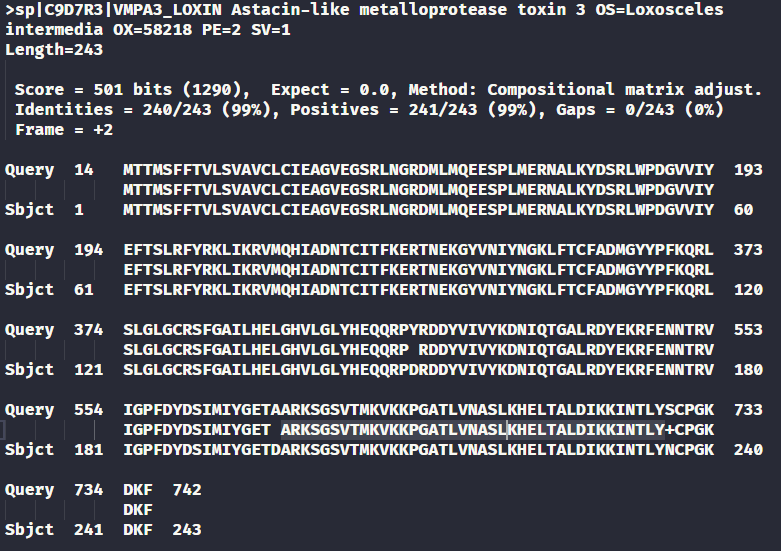


> DQ218155.1

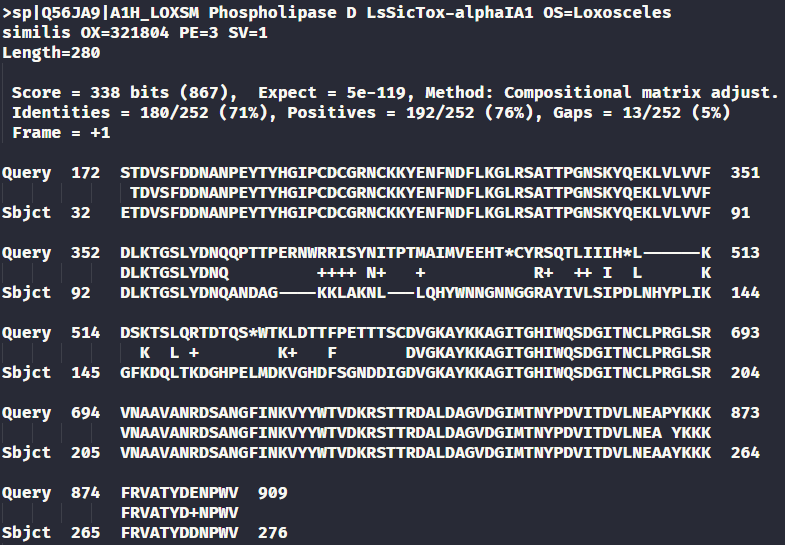

> KC237286.1

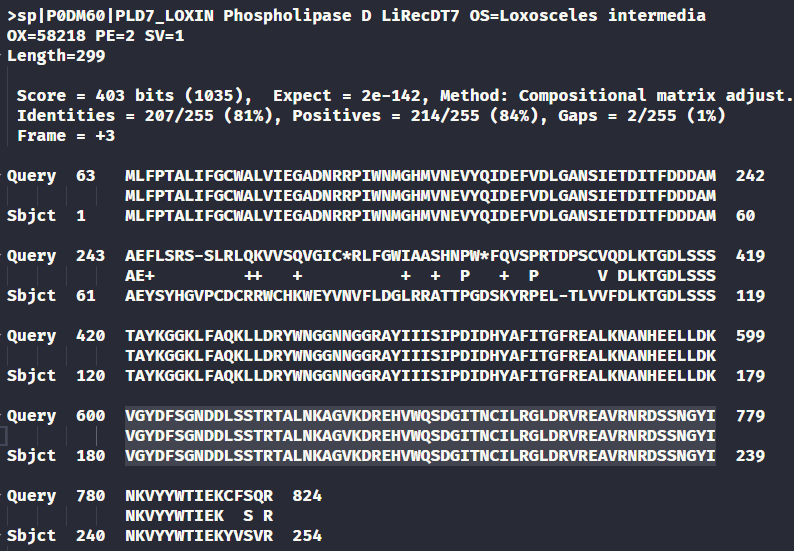


(2)Qual a porcentagem de identidade, similaridades “positivas” e gaps? O que significa o
valor “positives”?

> GQ227491.1

* Positives 99%
* Gaps 0%

> DQ218155.1

* Positives 76%
* Gaps 5%

> KC237286.1

* Positives 84%
* Gaps 1%

**Positives: número de aminoácidos que são idênticos entre a consulta e a sequência ou têm propriedades químicas semelhantes**

iii) Analisando o resultado do blast, qual função de proteína você atribuiria a cada sequência
query? Justifique sua escolha.

> GQ227491.1

* metalloprotease

 ``As metaloproteinases são enzimas que digerem proteínas da matriz extracelular e que apresentam funções importantes em diversos processos biológicos, como morfogênese, e em todos os estágios da cicatrização: reparação tecidual e remodelação em resposta à injúria``

> DQ218155.1 e > KC237286.1

* Phospholipase D

  ``A fosfolipase D catalisa a hidrólise da ligação fosfodiéster de glicerofosfolipídios para gerar ácido fosfatídico e um grupo de cabeça livre. ``


Justifativa: Para cada sequencia, todas as sequencias que produziram alinhamentos signaficativos para cada sequencia exercem essas funcoes